In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras as k

Using TensorFlow backend.


In [2]:
train_dataset = pd.read_csv('data/train.csv')

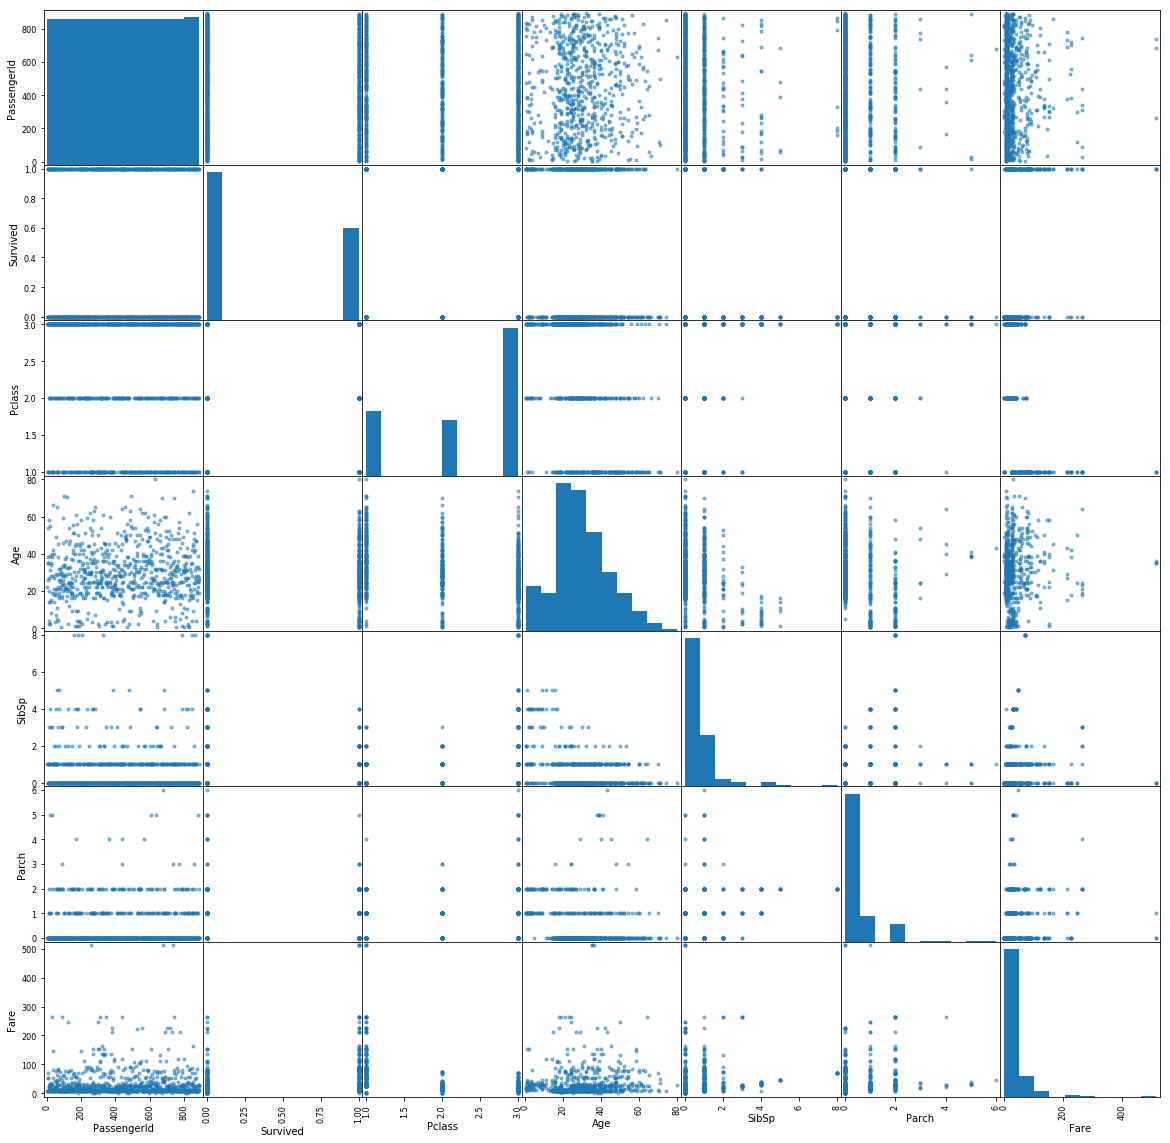

In [3]:
pd.scatter_matrix(train_dataset, figsize=(20,20))
plt.show()

In [4]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#male = 0
train_dataset['Sex'].replace(['male', 'female'], [0,1], inplace = 'True')

In [6]:
#C = 0, S = 1, Q = 2
train_dataset['Embarked'].replace(['C', 'S', 'Q'], [0,1,2], inplace = 'True')

In [7]:
train_dataset['Age'] = train_dataset['Age'].apply(lambda x: x/10)

In [8]:
# parch - number of parents children on board
train_dataset['Parch'].head(8)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
Name: Parch, dtype: int64

In [9]:
train_dataset['Fare'] = train_dataset['Fare'].apply(lambda x: x/10)

In [159]:
smaller_train = train_dataset[['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [162]:
smaller_train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,2.2,1,0,0.72500,1.0
1,1,1,1,3.8,1,0,7.12833,0.0
2,1,3,1,2.6,0,0,0.79250,1.0
3,1,1,1,3.5,1,0,5.31000,1.0
4,0,3,0,3.5,0,0,0.80500,1.0
6,0,1,0,5.4,0,0,5.18625,1.0
7,0,3,0,0.2,3,1,2.10750,1.0
8,1,3,1,2.7,0,2,1.11333,1.0
9,1,2,1,1.4,1,0,3.00708,0.0
10,1,3,1,0.4,1,1,1.67000,1.0


In [161]:
smaller_train = smaller_train.dropna()

In [163]:
x_train_numpy = smaller_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].as_matrix()

In [164]:
np.shape(x_train_numpy)

(712, 7)

In [102]:
#xx = x_train_numpy[~np.isnan(x_train_numpy).any(axis=1)]

In [165]:
y_train = smaller_train['Survived']

In [166]:
y_train_numpy = y_train.as_matrix()

In [167]:
y_train_numpy = y_train_numpy.reshape(712,1)

In [168]:
np.shape(y_train_numpy)

(712, 1)

In [210]:
model = k.models.Sequential()

In [211]:
model.add(k.layers.Dense(units=64, input_dim = 7))
model.add(k.layers.LeakyReLU())
model.add(k.layers.Dropout(0.5))
model.add(k.layers.Dense(units=32))
model.add(k.layers.LeakyReLU())
model.add(k.layers.Dense(units=32))
model.add(k.layers.LeakyReLU())
model.add(k.layers.Dropout(0.5))
model.add(k.layers.Dense(units=32))
model.add(k.layers.LeakyReLU())
model.add(k.layers.Dropout(0.5))
model.add(k.layers.Dense(units=1, activation='sigmoid'))
#model.add(k.layers.LeakyReLU())

In [212]:
adam = k.optimizers.Adam(lr=0.01)

In [213]:
model.compile(loss='binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [214]:
model.fit(x_train_numpy, y_train_numpy[0:712], epochs=15, batch_size=64)

Epoch 1/15
712/712 [==============================] - 3s 4ms/step - loss: 0.7409 - acc: 0.5997
Epoch 2/15
712/712 [==============================] - 0s 59us/step - loss: 0.6311 - acc: 0.6728
Epoch 3/15
712/712 [==============================] - 0s 65us/step - loss: 0.5943 - acc: 0.6882
Epoch 4/15
712/712 [==============================] - 0s 66us/step - loss: 0.5774 - acc: 0.7289
Epoch 5/15
712/712 [==============================] - 0s 61us/step - loss: 0.5598 - acc: 0.7430
Epoch 6/15
712/712 [==============================] - 0s 72us/step - loss: 0.5451 - acc: 0.7584
Epoch 7/15
712/712 [==============================] - 0s 77us/step - loss: 0.5278 - acc: 0.7626
Epoch 8/15
712/712 [==============================] - 0s 71us/step - loss: 0.5076 - acc: 0.7767
Epoch 9/15
712/712 [==============================] - 0s 66us/step - loss: 0.5411 - acc: 0.7612
Epoch 10/15
712/712 [==============================] - 0s 67us/step - loss: 0.5210 - acc: 0.7753
Epoch 11/15
712/712 [===================

In [84]:
k.callbacks.History()

In [216]:
test_dataset = pd.read_csv('data/test.csv')

In [218]:
test_dataset['Sex'].replace(['male', 'female'], [0,1], inplace = 'True')
test_dataset['Embarked'].replace(['C', 'S', 'Q'], [0,1,2], inplace = 'True')
test_dataset['Age'] = train_dataset['Age'].apply(lambda x: x/10)
test_dataset['Fare'] = train_dataset['Fare'].apply(lambda x: x/10)

In [233]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,3.45,0,0,330911,0.78292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,4.70,1,0,363272,0.70000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",0,6.20,0,0,240276,0.96875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,2.70,0,0,315154,0.86625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,2.20,1,1,3101298,1.22875,NaN,1


In [223]:
smaller_test = test_dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].as_matrix()

In [225]:
pred = model.predict(smaller_test)

In [286]:
f = pred > 0.5

In [288]:
ss = f.astype(int)

In [289]:
ss

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [290]:
test = pd.DataFrame(ss)

In [261]:
idx = list(range(892,1310))

In [262]:
idx

[892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 901,
 902,
 903,
 904,
 905,
 906,
 907,
 908,
 909,
 910,
 911,
 912,
 913,
 914,
 915,
 916,
 917,
 918,
 919,
 920,
 921,
 922,
 923,
 924,
 925,
 926,
 927,
 928,
 929,
 930,
 931,
 932,
 933,
 934,
 935,
 936,
 937,
 938,
 939,
 940,
 941,
 942,
 943,
 944,
 945,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 966,
 967,
 968,
 969,
 970,
 971,
 972,
 973,
 974,
 975,
 976,
 977,
 978,
 979,
 980,
 981,
 982,
 983,
 984,
 985,
 986,
 987,
 988,
 989,
 990,
 991,
 992,
 993,
 994,
 995,
 996,
 997,
 998,
 999,
 1000,
 1001,
 1002,
 1003,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1015,
 1016,
 1017,
 1018,
 1019,
 1020,
 1021,
 1022,
 1023,
 1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1043,
 1044,
 1045,
 1046,
 1047,
 1048,
 1049,
 1

In [293]:
submit = np.column_stack((idx,ss))

In [294]:
submit

array([[ 892,    0],
       [ 893,    0],
       [ 894,    0],
       [ 895,    0],
       [ 896,    0],
       [ 897,    0],
       [ 898,    1],
       [ 899,    0],
       [ 900,    1],
       [ 901,    0],
       [ 902,    0],
       [ 903,    0],
       [ 904,    1],
       [ 905,    0],
       [ 906,    1],
       [ 907,    1],
       [ 908,    0],
       [ 909,    0],
       [ 910,    0],
       [ 911,    0],
       [ 912,    0],
       [ 913,    0],
       [ 914,    0],
       [ 915,    0],
       [ 916,    1],
       [ 917,    0],
       [ 918,    1],
       [ 919,    0],
       [ 920,    0],
       [ 921,    0],
       [ 922,    0],
       [ 923,    0],
       [ 924,    0],
       [ 925,    0],
       [ 926,    0],
       [ 927,    0],
       [ 928,    0],
       [ 929,    1],
       [ 930,    0],
       [ 931,    0],
       [ 932,    0],
       [ 933,    0],
       [ 934,    0],
       [ 935,    1],
       [ 936,    1],
       [ 937,    0],
       [ 938,    0],
       [ 939,

In [295]:
submit_df = pd.DataFrame(submit)

In [296]:
submit_df.columns = ['PassengerId', 'Survived']

In [297]:
submit_df.to_csv("data/submit.csv", index = False)